<a href="https://colab.research.google.com/github/mabdull9/IT7103/blob/main/Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import numpy as np

# Load the dataset from a specific file path
data = pd.read_csv("/content/auto-mpg.csv")

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)


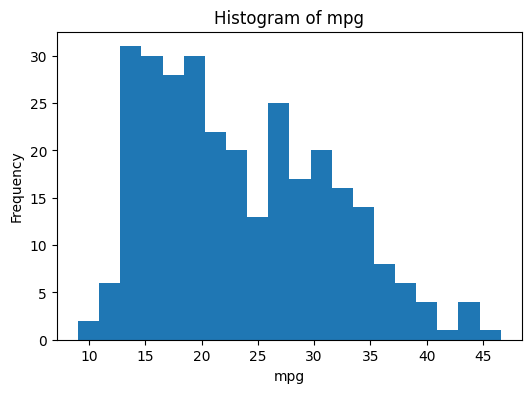

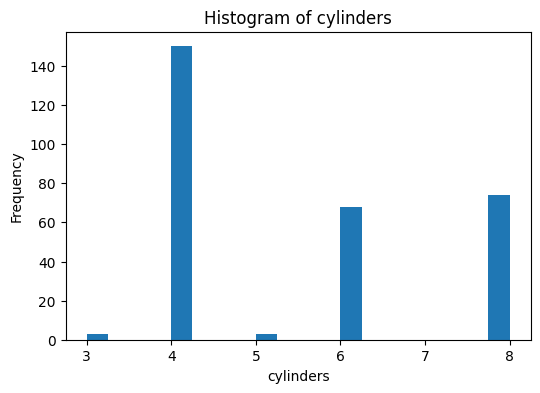

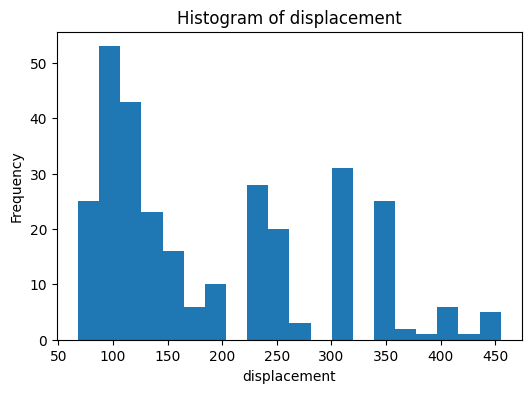

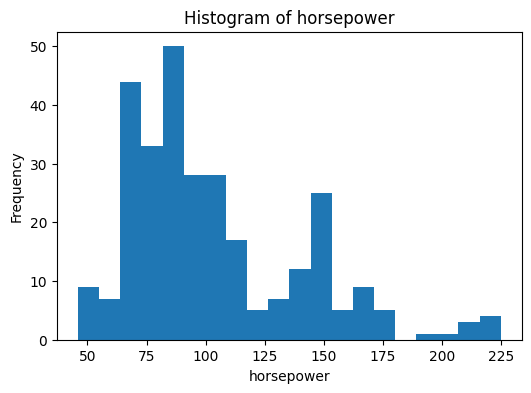

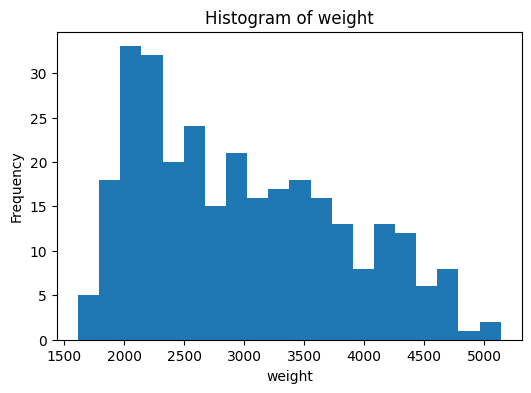

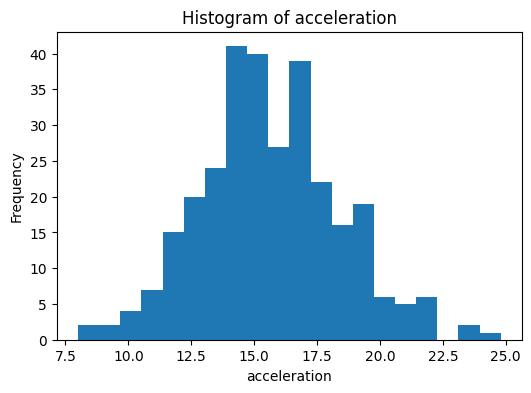

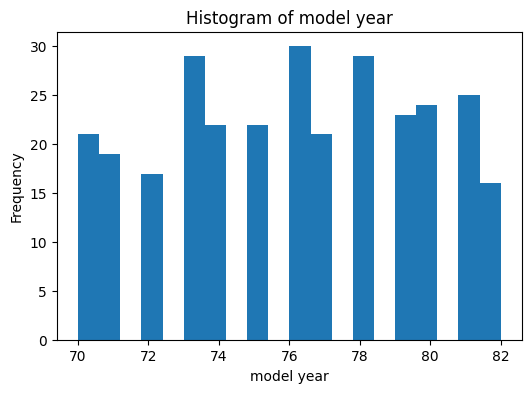

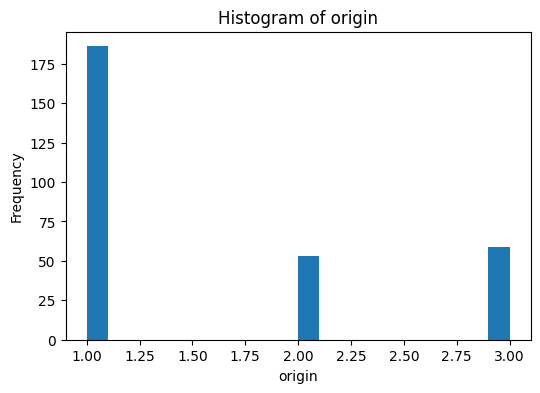

In [4]:
# Reset the indices for both the training and testing data
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Identify columns with numeric and categorical data
numeric_columns = train_data.select_dtypes(include=['float64', 'int64'])
categorical_columns = train_data.select_dtypes(include=['object'])

# Create histograms for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(train_data[column], bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
# Define groups of columns for preprocessing
numeric_symmetric_cols = []  # Placeholder for symmetric numeric columns
numeric_skewed_cols = []     # Placeholder for skewed numeric columns
categorical_cols = list(categorical_columns.columns)  # Use all categorical columns

# Create transformers for processing numeric columns
numeric_symmetric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

numeric_skewed_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

# Create a transformer for processing categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_symmetric', numeric_symmetric_transformer, numeric_symmetric_cols),
        ('num_skewed', numeric_skewed_transformer, numeric_skewed_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the main data processing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train = pipeline.fit_transform(train_data)

# Transform the test data
X_test = pipeline.transform(test_data)

# Print the shapes of the processed data
print("Shape of processed training data:", X_train.shape)
print("Shape of processed testing data:", X_test.shape)

Shape of processed training data: (298, 232)
Shape of processed testing data: (100, 232)
